# Analisando os Sentimentos na Discografia de Niall Horan

A análise de sentimentos e inferência de emoções em músicas são técnicas que buscam identificar e interpretar as emoções expressas nas letras das canções. Esse tipo de análise utiliza algoritmos e modelos de aprendizado de máquina, como o Processamento de Linguagem Natural (PLN), para avaliar as palavras e frases contidas nas letras, classificando-as em polaridades como positivo, negativo ou neutro.

As letras de músicas são ricas em emoção e podem refletir uma ampla gama de sentimentos, como amor, tristeza, alegria, raiva e nostalgia, logo, a análise de sentimentos permite que artistas, produtores e ouvintes compreendam melhor como a música pode impactar as emoções humanas e a percepção do público. Com o avanço das tecnologias de Inteligência Artificial (IA) e PLN, a análise de sentimento em músicas está se tornando cada vez mais sofisticada, permitindo uma compreensão mais profunda e complexa das emoções humanas expressas através da arte musical.

## Importando Bibliotecas

In [1]:
# Importando bibliotecas de manipulação e análise de dados
import pandas as pd  # Usado para manipulação de tabelas e dataframes
import numpy as np   # Usado para operações matemáticas e arrays numéricos

# Biblioteca para processamento de imagens
from PIL import Image  # Usado para abrir, manipular e processar imagens

# Biblioteca para geração de nuvem de palavras (wordcloud)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# STOPWORDS: remove palavras irrelevantes
# ImageColorGenerator: usa as cores de uma imagem para colorir a wordcloud

# Biblioteca de NLP (Processamento de Linguagem Natural)
from nltk.tokenize import word_tokenize  # Quebra textos em palavras (tokens)

# Biblioteca para visualização de dados
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações
from matplotlib.pyplot import figure  # Ajuste de tamanho de figuras
%matplotlib inline

# Baixando recursos da biblioteca NLTK
import nltk
nltk.download('punkt_tab')  # Tokenizador de pontuação/tabulação
nltk.download('vader_lexicon')  # Léxico para análise de sentimentos com VADER (análise de sentimentos)

# Biblioteca de visualização estatística
import seaborn as sns  # Estilização e gráficos estatísticos avançados

# Instalando bibliotecas com ! (comando de terminal usado no Jupyter)
!pip install shapely  # manipulação de formas geométricas
!pip install descartes       # Necessária para exibir formas geométricas com matplotlib
!pip install pyplutchik      # Biblioteca para visualização de emoções com o modelo de Plutchik

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## Carregando arquivo com as músicas

O arquivo CSV foi gerado no notebook *Lyrics.ipynb*, contendo informações detalhadas sobre as músicas do famoso cantor. O *dataset* inclui dados como título das faixas, álbum e ano de lançamento através da API *Genius*. A exportação para CSV permite uma fácil visualização, análise e compartilhamento dos dados.

In [2]:
# Leitura do Arquivo
df=pd.read_csv("NiallHoranLyrics.csv")

# Remove a coluna 'release_date'
df = df.drop(columns=['release_date'])

# Visualização do Dataframe
df

title  \
0                                Slow Hands   
1                                 This Town   
2                           Too Much to Ask   
3                                   Flicker   
4                           Nice to Meet Ya   
5                   Put a Little Love on Me   
6                                    Heaven   
7                           Black And White   
8                              On the Loose   
9                              Seeing Blind   
10                       Heartbreak Weather   
11                                    Still   
12                                  Mirrors   
13                             Paper Houses   
14                             No Judgement   
15                                On My Own   
16                               You and Me   
17                               Small Talk   
18                                 The Show   
19                            Dear Patience   
20                        Since We’re Alone   
21                               Everywhere   
22                                Fire Away   
23                                 The Tide   
24                          Cross Your Mind   
25                       Arms of a Stranger   
26                                 Meltdown   
27                           Bend the Rules   
28                            San Francisco   
29                                  Science   
30                   You Could Start A Cult   
31                                  So Long   
32                            Never Grow Up   
33                                New Angel   
34                             Finally Free   
35                             Must Be Love   
36                          If You Leave Me   
37                             Save My Life   
38                  On A Night Like Tonight   
39                                  Nothing   
40                                    Dress   
41                              Fool’s Gold   
42  You Could Start A Cult (Encore Version)   
43                                    Lover   
44                                    Candy   
45                                  Circles   

                                               lyrics  \
0     take back place that said right face cause w...   
1    waking kiss nobody there smell perfume still ...   
2    waitin someone only yesterday smile back face...   
3    when feel love taken when know there somethin...   
4    like talk like things wear want number tattoo...   
5    fight high holdin love came cause nothing hol...   
6    strange light revolves around float across ro...   
7    that first night standin door fumblin keys ki...   
8    know like mind wraps around truth jump flight...   
9    niall horan niall horan maren morris seen see...   
10   swear lightnin comin eyes startin fire hotel ...   
11   mind complicated find hard rearrange find som...   
12   closed door hides behind face nobody knows fe...   
13   three four  house broken hearts made love sta...   
14   barefoot bottle wine stay tonight change when...   
15   everybody somebody wanna alone well need much...   
16   young heart wild free know starts ends hard r...   
17   lookin night terrified know baby wrong crazy ...   
18   life like board game time mistakes heartbreak...   
19   dear patience share drink pressure dear patie...   
20   like rain sunny there shadow behind face tell...   
21   walk room quiet catch eyes blink eyelid feels...   
22   keep saying alright fake smile there reservoi...   
23   ready feel coming coming again stay close hol...   
24   world wanna live ocean wanna swim show watchi...   
25   never thought would find lovers dark known so...   
26   when melts down there  talkin yeah bathroom l...   
27   called miss babe wonder doin your favourite p...   
28   moon shining rising want wake lights fading c...   
29   feel what beneath stone cold feet numb touch ...   
30   darlin give everything baby could start cult ...   
31  

In [3]:
# Eliminando músicas remix e repetidas
df = df.drop(index=[31,34,41,44,45])

# Reseta o índice, se necessário
df.reset_index(drop=True, inplace=True)

# Visualização do Dataframe
df

title  \
0                                Slow Hands   
1                                 This Town   
2                           Too Much to Ask   
3                                   Flicker   
4                           Nice to Meet Ya   
5                   Put a Little Love on Me   
6                                    Heaven   
7                           Black And White   
8                              On the Loose   
9                              Seeing Blind   
10                       Heartbreak Weather   
11                                    Still   
12                                  Mirrors   
13                             Paper Houses   
14                             No Judgement   
15                                On My Own   
16                               You and Me   
17                               Small Talk   
18                                 The Show   
19                            Dear Patience   
20                        Since We’re Alone   
21                               Everywhere   
22                                Fire Away   
23                                 The Tide   
24                          Cross Your Mind   
25                       Arms of a Stranger   
26                                 Meltdown   
27                           Bend the Rules   
28                            San Francisco   
29                                  Science   
30                   You Could Start A Cult   
31                            Never Grow Up   
32                                New Angel   
33                             Must Be Love   
34                          If You Leave Me   
35                             Save My Life   
36                  On A Night Like Tonight   
37                                  Nothing   
38                                    Dress   
39  You Could Start A Cult (Encore Version)   
40                                    Lover   

                                               lyrics  \
0     take back place that said right face cause w...   
1    waking kiss nobody there smell perfume still ...   
2    waitin someone only yesterday smile back face...   
3    when feel love taken when know there somethin...   
4    like talk like things wear want number tattoo...   
5    fight high holdin love came cause nothing hol...   
6    strange light revolves around float across ro...   
7    that first night standin door fumblin keys ki...   
8    know like mind wraps around truth jump flight...   
9    niall horan niall horan maren morris seen see...   
10   swear lightnin comin eyes startin fire hotel ...   
11   mind complicated find hard rearrange find som...   
12   closed door hides behind face nobody knows fe...   
13   three four  house broken hearts made love sta...   
14   barefoot bottle wine stay tonight change when...   
15   everybody somebody wanna alone well need much...   
16   young heart wild free know starts ends hard r...   
17   lookin night terrified know baby wrong crazy ...   
18   life like board game time mistakes heartbreak...   
19   dear patience share drink pressure dear patie...   
20   like rain sunny there shadow behind face tell...   
21   walk room quiet catch eyes blink eyelid feels...   
22   keep saying alright fake smile there reservoi...   
23   ready feel coming coming again stay close hol...   
24   world wanna live ocean wanna swim show watchi...   
25   never thought would find lovers dark known so...   
26   when melts down there  talkin yeah bathroom l...   
27   called miss babe wonder doin your favourite p...   
28   moon shining rising want wake lights fading c...   
29   feel what beneath stone cold feet numb touch ...   
30   darlin give everything baby could start cult ...   
31   never never never never grow grow never never...   
32   many hours night every second every thought w...   
33   specialist overthinkin everything tell time b...   
34   ever yeah yeah  dream chase street turned aro...   
35   eyes b

In [6]:
# Lista de palavras indesejadas presentes na discografia e não identificadas na etapa de tokenização
indesejadas = ['niall','horan','na','yeah','that','this','what','when']

# Remove as palavras indesejadas, e salva de volta como um texto longo
df['lyrics'] = df['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 4865 palavras no dataset de letra.
Existem 880 palavras únicas no dataset de letras.


## Análise da Discografia
Primeiramente, será realizada uma análise exploratória do dataset como um todo, visando compreender sua estrutura, distribuição e características principais. Essa etapa é essencial para identificar padrões, possíveis inconsistências e *insights* iniciais sobre os dados. Essa análise preliminar ajudará a direcionar investigações mais específicas e a garantir a qualidade dos dados antes de aprofundar o estudo.

### Analisando o Dataset

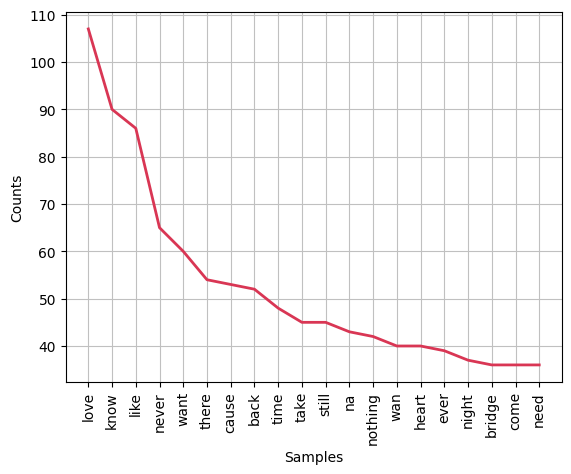

In [7]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Resultado do Gráfico</strong><br>
    Top 20 palavras mais frequentes na discografia do cantor.
</div>

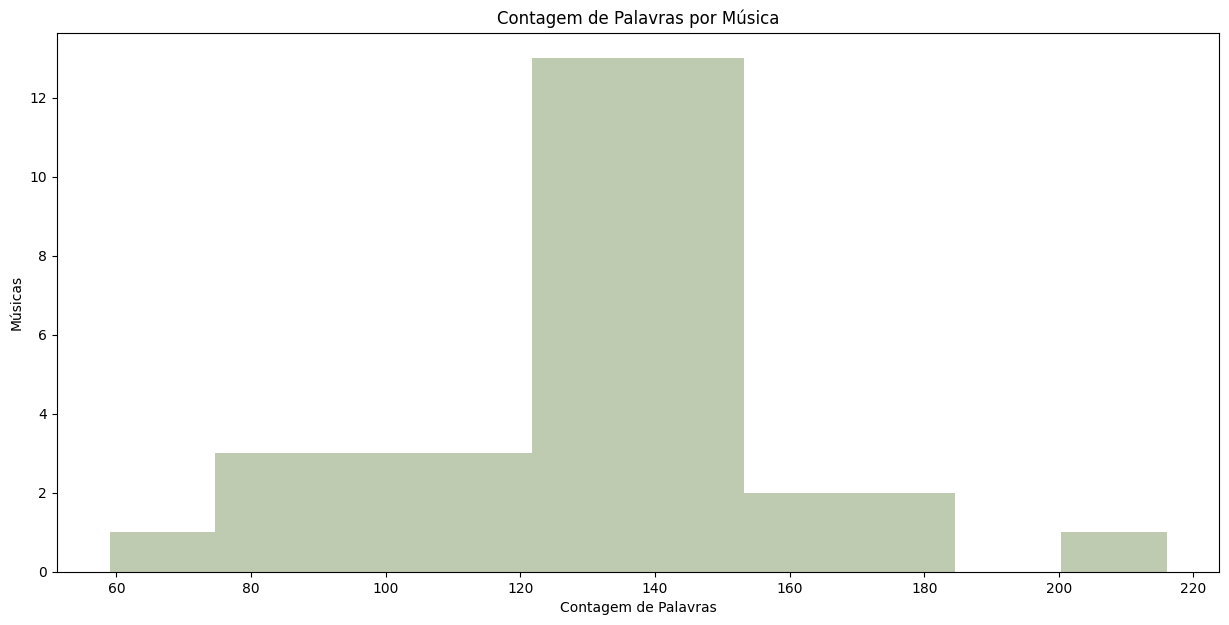

In [8]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    O resultado é um histograma que representa a distribuição da contagem de palavras das músicas. Cada barra no histograma mostra quantas músicas caem dentro de cada intervalo de contagem de palavras. Isso permite visualizar rapidamente como as músicas se distribuem em relação à sua contagem de palavras, identificando padrões, como se a maioria das músicas tende a ser mais curtas ou mais longas.
</div>

### Análise de Sentimento da Discografia

A análise de sentimentos é uma técnica da área de Processamento de Linguagem Natural (PLN) que tem como objetivo identificar e classificar emoções expressas em textos, como opiniões, comentários, avaliações e postagens em redes sociais. Um dos principais aspectos dessa análise é a **polaridade**, que indica a direção do sentimento expresso: **positivo**, **negativo** ou **neutro**.

**Polaridade Positiva** refere-se a textos que expressam sentimentos favoráveis, elogios ou apreciações. Exemplos incluem palavras como "ótimo", "maravilhoso", "excelente" e "gostei". Comentários positivos geralmente indicam satisfação com um produto, serviço ou experiência.

**Polaridade Negativa**, por sua vez, é associada a emoções negativas, críticas ou insatisfações. Termos como "horrível", "péssimo", "não gostei" e "decepcionante" são indicadores comuns. Esse tipo de polaridade ajuda a identificar pontos de melhoria a partir de feedbacks negativos dos usuários.

Já a **Polaridade Neutra** está presente em textos que não expressam uma opinião clara ou não possuem carga emocional significativa. Comentários como "o produto chegou ontem", "estava chovendo" ou "fiz a compra hoje" são exemplos de frases informativas, sem julgamento emocional.

Em aplicações práticas, a identificação correta da polaridade é essencial para empresas e pesquisadores compreenderem melhor o comportamento e a percepção dos usuários. Isso pode influenciar estratégias de marketing, aprimoramento de produtos e até mesmo monitoramento de reputação online.

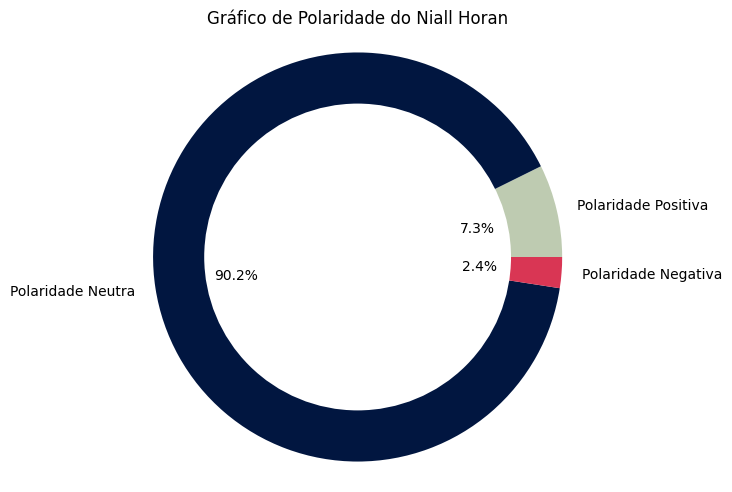

In [10]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do Niall Horan')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia apresenta 2.4% de polaridade negativa e 7.3% de polaridade positiva.
</div>

### Nuvem de Palavras
A **nuvem de palavras** (ou *word cloud*, em inglês) é uma técnica visual utilizada para representar a frequência ou relevância de palavras em um determinado conjunto de dados textuais. Nesse tipo de visualização, quanto mais uma palavra aparece em um texto ou conjunto de textos, maior será o seu destaque na nuvem — normalmente por meio de um tamanho de fonte mais elevado.

Essa ferramenta é muito usada em análises exploratórias de dados textuais, especialmente em áreas como análise de sentimentos, mineração de texto, marketing digital, pesquisa acadêmica, entre outras. Ela permite uma compreensão rápida dos termos mais recorrentes em conteúdos como comentários de usuários, postagens em redes sociais, discursos políticos, letras de músicas ou avaliações de produtos.

A construção de uma nuvem de palavras geralmente envolve etapas de pré-processamento do texto, como:
- **Remoção de stopwords** (palavras comuns como “de”, “o”, “e”, que não agregam valor semântico relevante);
- **Lematização ou stemming** (redução de palavras à sua forma base);
- **Tratamento de pontuação e acentuação**.

Embora seja uma técnica simples, a nuvem de palavras oferece uma forma intuitiva e visual de identificar temas recorrentes, tendências e padrões de linguagem.

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count'], dtype='object')


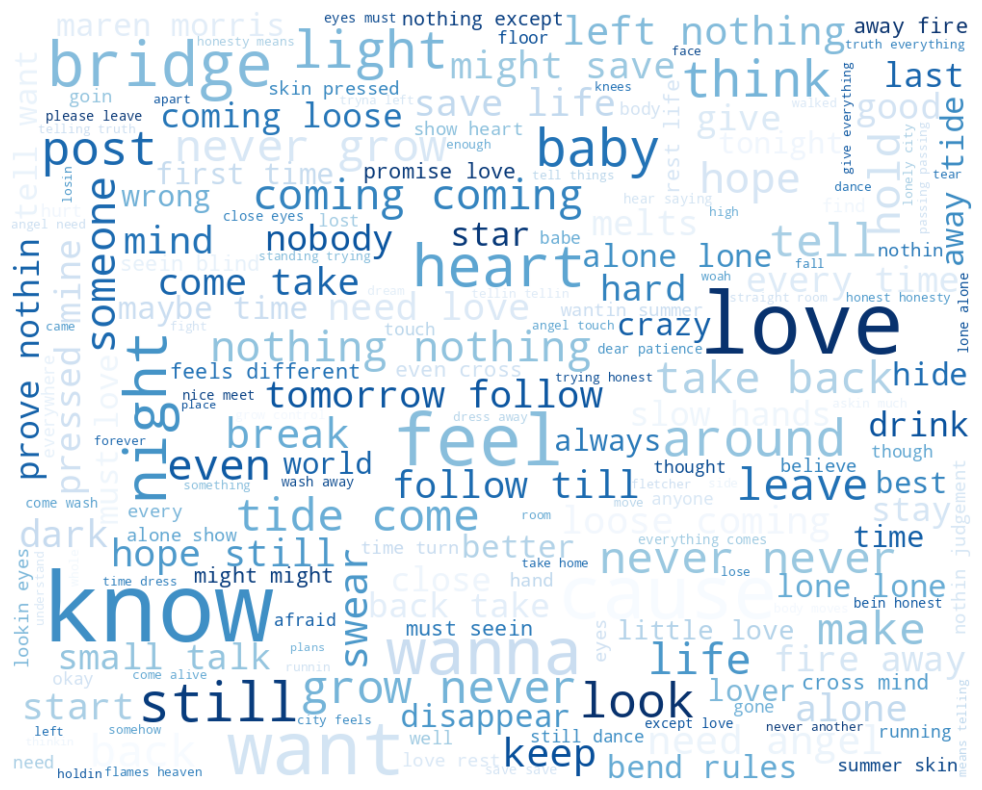

In [11]:
# Exibir os nomes das colunas do DataFrame
print(df.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df['lyrics'] = df['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

## Análise NRC para Inferência de Emoções
O arquivo NRC (National Research Council) é um recurso amplamente utilizado na análise de sentimentos, especialmente no contexto de processamento de linguagem natural (PLN) e mineração de texto. O NRC desenvolveu um léxico de sentimentos que categoriza palavras em diferentes emoções, permitindo que pesquisadores e desenvolvedores analisem letras de músicas, resenhas e outros textos em relação a sentimentos específicos.

### Estrutura do Arquivo NRC
O léxico do NRC é estruturado em várias colunas, onde as palavras são associadas a diferentes emoções e sentimentos, incluindo: Alegria, Tristeza, Medo,
Raiva, Surpresa, Desprezo, Confiança e Antipatia. Cada palavra no léxico é marcada como presente ou ausente em relação a essas emoções, permitindo que os usuários quantifiquem e analisem a presença de sentimentos em um texto.

### Aplicações na Análise de Músicas
Identificação de Emoções: Ao aplicar o léxico NRC às letras de músicas, é possível identificar quais emoções são mais proeminentes em uma canção. Por exemplo, uma letra pode ser classificada como predominantemente alegre, triste ou reflexiva.

**Comparação Entre Músicas:** O NRC permite a comparação de diferentes músicas ou álbuns, facilitando a análise de como os sentimentos evoluem ao longo do tempo ou entre diferentes artistas. Essa comparação pode revelar como as temáticas abordadas nas letras mudam conforme a carreira de um artista avança.

**Análise de Tendências:** Ao analisar um conjunto de músicas (por exemplo, todas as músicas lançadas em um determinado ano), os pesquisadores podem identificar tendências emocionais na música popular. Isso pode fornecer insights sobre a cultura e os sentimentos coletivos de uma sociedade em um período específico.

**Desenvolvimento de Recomendação:** O entendimento dos sentimentos nas músicas pode ajudar a criar sistemas de recomendação mais personalizados, sugerindo músicas com base no estado emocional do ouvinte.

O uso do arquivo NRC na análise de letras de músicas é uma ferramenta poderosa para compreender as emoções expressas na música. Com a capacidade de quantificar sentimentos, pesquisadores e desenvolvedores podem explorar a rica tapeçaria emocional das letras e como elas ressoam com os ouvintes. Essa análise não apenas enriquece nossa compreensão da música como arte, mas também nos oferece uma janela para as emoções humanas e a cultura contemporânea.

In [12]:
#Biblioteca para usar o NRC alinhado ao NLTK
from collections import defaultdict

# Carregar o lexicon NRC
nrc = pd.read_csv("NRC.tsv", sep='\t', names=['word', 'sentiment', 'association'])
nrc = nrc[nrc['association'] == 1]

# Definir emoções (exclui 'positive' e 'negative')
emotion_sentiments = {
    'anger', 'anticipation', 'disgust', 'fear',
    'joy', 'sadness', 'surprise', 'trust'
}

# Dicionário: palavra -> lista de emoções
nrc_dict = defaultdict(list)
for _, row in nrc.iterrows():
    if row['sentiment'] in emotion_sentiments:
        nrc_dict[row['word']].append(row['sentiment'])

# Emoções positivas e negativas para score
positive = {'joy', 'trust', 'anticipation', 'surprise'}
negative = {'anger', 'fear', 'disgust', 'sadness'}

# Função de análise
def analyze_text(text):
    tokens = word_tokenize(text.lower())
    sentiments_count = defaultdict(int)

    for token in tokens:
        for sentiment in nrc_dict.get(token, []):
            sentiments_count[sentiment] += 1

    score = sum(sentiments_count[s] for s in positive) - \
            sum(sentiments_count[s] for s in negative)

    dominant_emotion = max(sentiments_count, key=sentiments_count.get) if sentiments_count else 'neutral'
    filter_label = 'intenso' if abs(score) > 2 else 'neutro'

    return pd.Series([score, dominant_emotion, filter_label], index=['score', 'sentiment', 'filter'])

# Aplicar no DataFrame
df[['score', 'sentiment', 'filter']] = df['lyrics'].apply(analyze_text)

# Normalizar a coluna 'score' entre -1 e 1
min_score = df['score'].min()
max_score = df['score'].max()

# Evitar divisão por zero se max == min
if min_score != max_score:
    df['score'] = 2 * ((df['score'] - min_score) / (max_score - min_score)) - 1
else:
    df['score'] = 0  # ou qualquer valor neutro

# Fazendo cópias para análises profundas
df_original = df.copy()
df_original_2 = df_original.copy()
df_original_3 = df_original.copy()
df_original_4 = df_original.copy()

# Exibir resultado
df

title  \
0                                Slow Hands   
1                                 This Town   
2                           Too Much to Ask   
3                                   Flicker   
4                           Nice to Meet Ya   
5                   Put a Little Love on Me   
6                                    Heaven   
7                           Black And White   
8                              On the Loose   
9                              Seeing Blind   
10                       Heartbreak Weather   
11                                    Still   
12                                  Mirrors   
13                             Paper Houses   
14                             No Judgement   
15                                On My Own   
16                               You and Me   
17                               Small Talk   
18                                 The Show   
19                            Dear Patience   
20                        Since We’re Alone   
21                               Everywhere   
22                                Fire Away   
23                                 The Tide   
24                          Cross Your Mind   
25                       Arms of a Stranger   
26                                 Meltdown   
27                           Bend the Rules   
28                            San Francisco   
29                                  Science   
30                   You Could Start A Cult   
31                            Never Grow Up   
32                                New Angel   
33                             Must Be Love   
34                          If You Leave Me   
35                             Save My Life   
36                  On A Night Like Tonight   
37                                  Nothing   
38                                    Dress   
39  You Could Start A Cult (Encore Version)   
40                                    Lover   

                                               lyrics  \
0   take back place said right face cause want wan...   
1   waking kiss nobody there smell perfume still s...   
2   waitin someone only yesterday smile back face ...   
3   feel love taken know there somethin missin dar...   
4   like talk like things wear want number tattooe...   
5   fight high holdin love came cause nothing hold...   
6   strange light revolves around float across roo...   
7   first night standin door fumblin keys kissed w...   
8   know like mind wraps around truth jump flight ...   
9   maren morris seen seen paper dreams watched un...   
10  swear lightnin comin eyes startin fire hotel r...   
11  mind complicated find hard rearrange find some...   
12  closed door hides behind face nobody knows fee...   
13  three four house broken hearts made love stack...   
14  barefoot bottle wine stay tonight change aroun...   
15  everybody somebody wanna alone well need much ...   
16  young heart wild free know starts ends hard ro...   
17  lookin night terrified know baby wrong crazy m...   
18  life like board game time mistakes heartbreaks...   
19  dear patience share drink pressure dear patien...   
20  like rain sunny there shadow behind face tell ...   
21  walk room quiet catch eyes blink eyelid feels ...   
22  keep saying alright fake smile there reservoir...   
23  ready feel coming coming again stay close hold...   
24  world wanna live ocean wanna swim show watchin...   
25  never thought would find lovers dark known som...   
26  melts down there talkin bathroom losin mind mi...   
27  called miss babe wonder doin your favourite pl...   
28  moon shining rising want wake lights fading ch...   
29  feel beneath stone cold feet numb touch silenc...   
30  darlin give everything baby could start cult a...   
31  never never never never grow grow never never ...   
32  many hours night every second every thought wr...   
33  specialist overthinkin everything tell time be...   
34  ever dream chase street turned around gone wok...   
35  eyes bl

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Normalização de Dados</strong><br>
    Para evitar validação cruzada de dados e separação de base de teste e aplicação, foi utilizado uma função de normalização de dados.
</div>

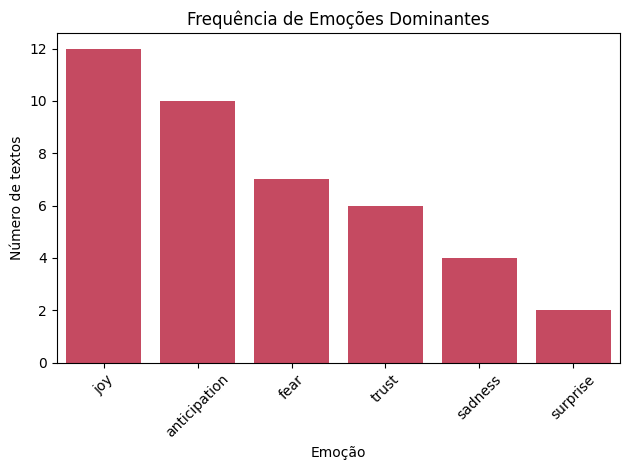

In [13]:
 # Cria um gráfico de barras com contagem
sns.countplot(
    x='sentiment',
    data=df,
    order=df['sentiment'].value_counts().index,  # Ordena as barras pela frequência de cada emoção
    color='#D93654'
)

# Construção do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()                             # Ajusta o layout para evitar que os textos fiquem cortados
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    A discografia possui alto teor de alegria e antecipação.
</div>

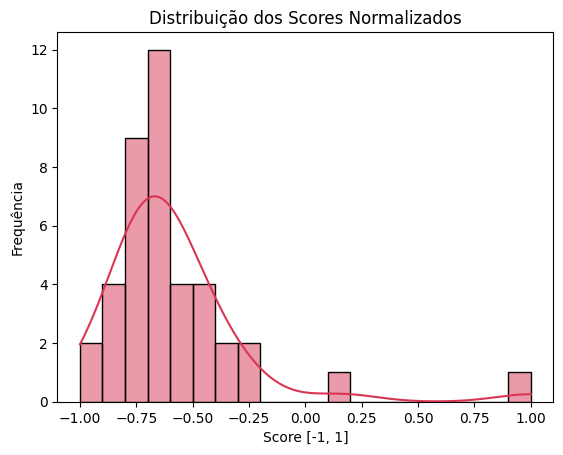

In [14]:
sns.histplot(df['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    Os scores estão bem concentrados na polaridade negativa.
</div>

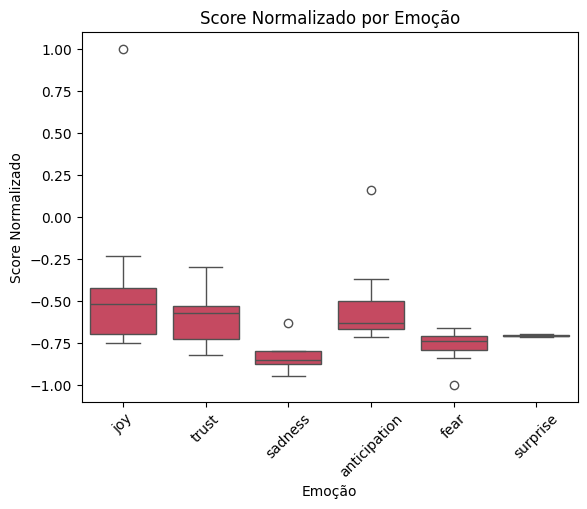

In [15]:
sns.boxplot(x='sentiment', y='score', data=df, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

Esse gráfico boxplot compara os scores normalizados de sentimento para cada emoção.

- O **centro da caixa** é a **mediana** (valor do meio).
- As **caixas** mostram o intervalo interquartílico (de 25% a 75% dos dados).
- Os **"bigodes"** (linhas fora das caixas) mostram a dispersão.
- Os **pontos fora do padrão** são **outliers**.



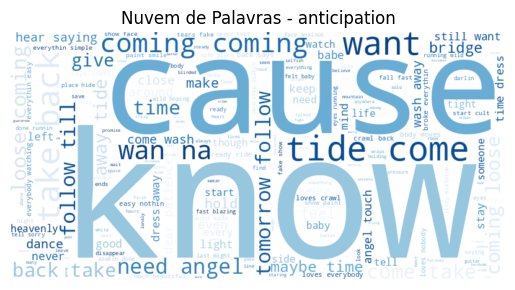

Nenhuma palavra encontrada para a emoção: disgust
Nenhuma palavra encontrada para a emoção: anger


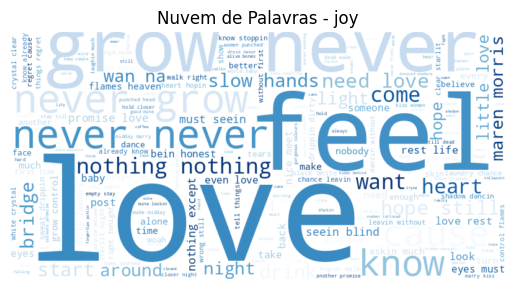

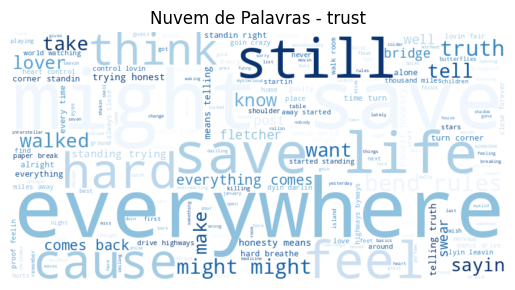

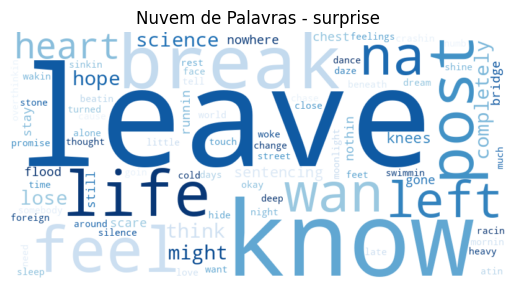

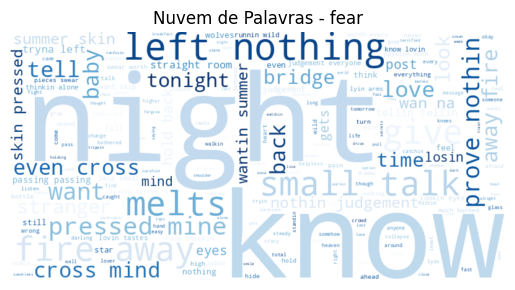

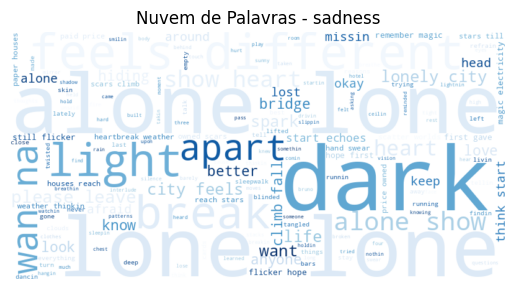

In [16]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []
    for text in df[df['sentiment'] == emotion]['lyrics']:
        words.extend(word_tokenize(text.lower()))

    # Verificar se há palavras antes de gerar a nuvem
    if not words:
        print(f"Nenhuma palavra encontrada para a emoção: {emotion}")
        continue

    # Gerar a nuvem de palavras com fundo branco e tons de azul
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',  # Fundo branco
        colormap='Blues'  # Paleta de tons de azul
    ).generate(' '.join(words))

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras - {emotion}')
    plt.show()

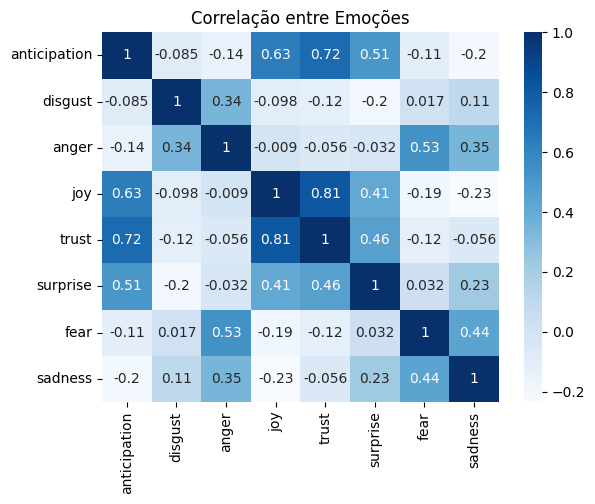

In [17]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

## Análise do álbum Flicker

*Flicker* é o álbum de estúdio de estreia do cantor e compositor irlandês. O seu lançamento ocorreu em 20 de outubro de 2017, através da *Neon Haze* e *Capitol Records*. Foi procedido pelos *singles* "Slow Hands", "Too Much To Ask", "On The Loose" e "Seeing Blind".

Mais informações em: https://pt.wikipedia.org/wiki/Flicker_(%C3%A1lbum)

In [18]:
# Filtrando o DataFrame para excluir músicas do seu álbum
df_f = df[df['Album'].isin(['Flicker (Target Exclusive/Japanese Edition)'])]

# Exibindo o DataFrame filtrado
df_f

title                                             lyrics  \
0          Slow Hands  take back place said right face cause want wan...   
1           This Town  waking kiss nobody there smell perfume still s...   
2     Too Much to Ask  waitin someone only yesterday smile back face ...   
3             Flicker  feel love taken know there somethin missin dar...   
8        On the Loose  know like mind wraps around truth jump flight ...   
9        Seeing Blind  maren morris seen seen paper dreams watched un...   
12            Mirrors  closed door hides behind face nobody knows fee...   
13       Paper Houses  three four house broken hearts made love stack...   
15          On My Own  everybody somebody wanna alone well need much ...   
16         You and Me  young heart wild free know starts ends hard ro...   
20  Since We’re Alone  like rain sunny there shadow behind face tell ...   
22          Fire Away  keep saying alright fake smile there reservoir...   
23           The Tide  ready feel coming coming again stay close hold...   

                                          Album  release_year  Word Count  \
0   Flicker (Target Exclusive/Japanese Edition)          2017         146   
1   Flicker (Target Exclusive/Japanese Edition)          2016         143   
2   Flicker (Target Exclusive/Japanese Edition)          2017         123   
3   Flicker (Target Exclusive/Japanese Edition)          2017         131   
8   Flicker (Target Exclusive/Japanese Edition)          2017         138   
9   Flicker (Target Exclusive/Japanese Edition)          2017         135   
12  Flicker (Target Exclusive/Japanese Edition)          2017         153   
13  Flicker (Target Exclusive/Japanese Edition)          2017          96   
15  Flicker (Target Exclusive/Japanese Edition)          2017         124   
16  Flicker (Target Exclusive/Japanese Edition)          2017          85   
20  Flicker (Target Exclusive/Japanese Edition)          2017         169   
22  Flicker (Target Exclusive/Japanese Edition)          2017          92   
23  Flicker (Target Exclusive/Japanese Edition)          2017         144   

       score     sentiment   filter  
0  -0.696335           joy  intenso  
1  -0.539267         trust  intenso  
2  -0.748691           joy   neutro  
3  -0.633508       sadness  intenso  
8  -0.518325  anticipation  intenso  
9  -0.445026           joy  intenso  
12 -0.465969           joy  intenso  
13 -0.853403       sadness  intenso  
15 -0.497382           joy  intenso  
16 -0.685864  anticipation  intenso  
20 -0.853403       sadness  intenso  
22 -0.738220          fear   neutro  
23 -0.654450  anticipation  intenso

In [19]:
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_f['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 1516 palavras no dataset de letra.
Existem 397 palavras únicas no dataset de letras.


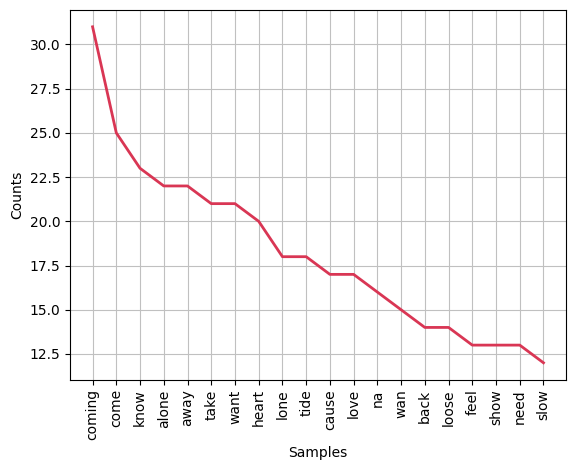

In [20]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

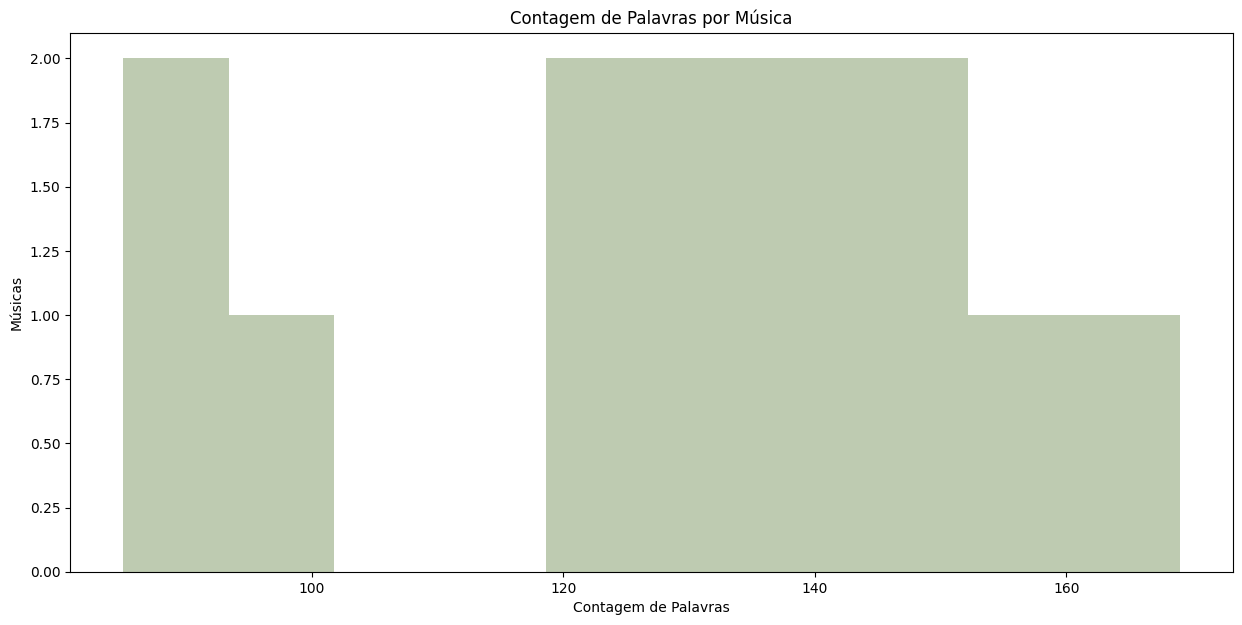

In [21]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_f['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

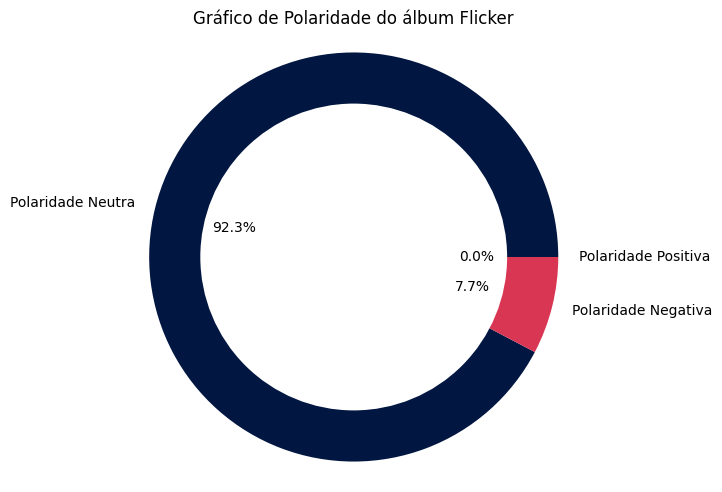

In [22]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_f['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_f['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum Flicker')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia apresenta 7.7% de polaridade negativa.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-23-7fb19d75d203>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['lyrics'] = df_f['lyrics'].fillna('')  # Substitui valores nulos por string vazia


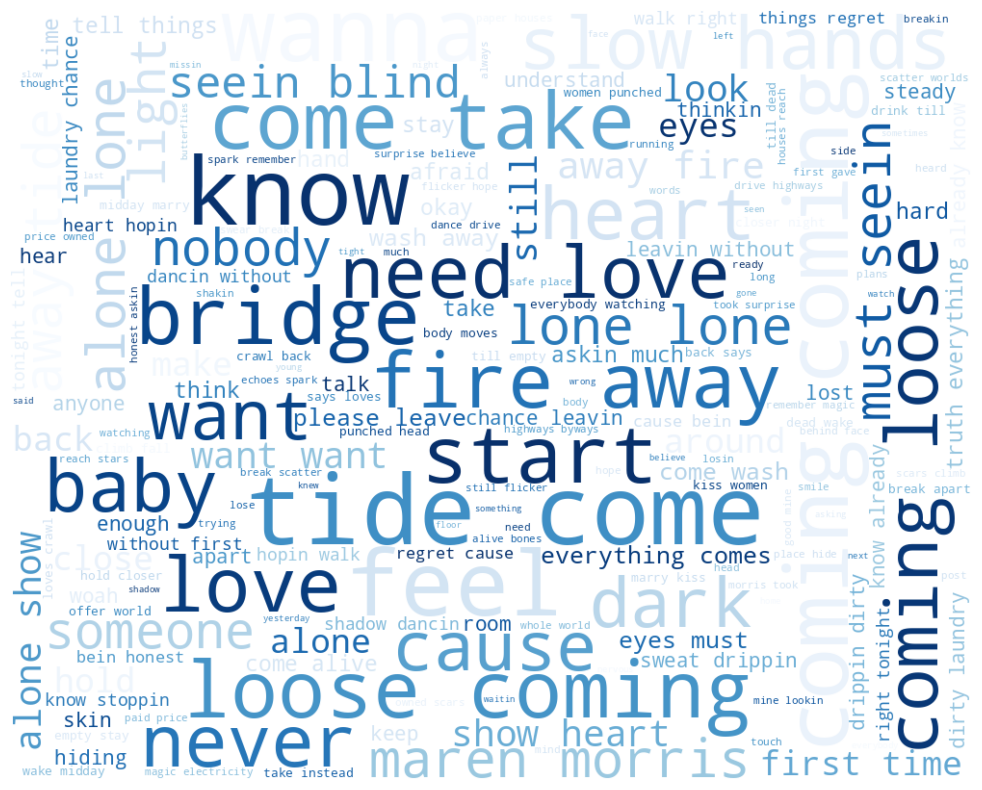

In [23]:
# Exibir os nomes das colunas do DataFrame
print(df_f.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_f.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_f['lyrics'] = df_f['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_f['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

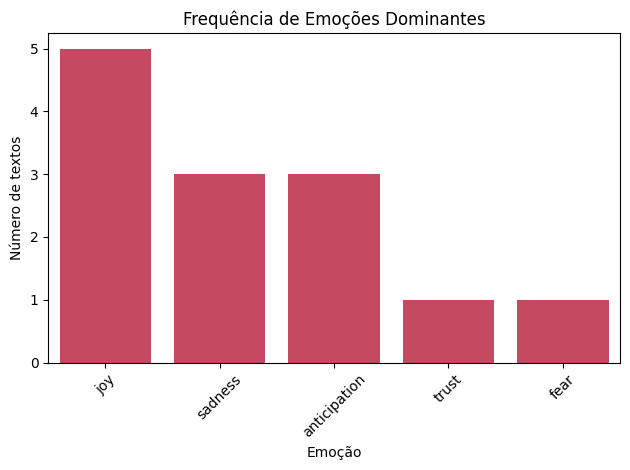

In [24]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_f,
    order=df_f['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

# Gerando o gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout() #Ajuste automático
plt.show()

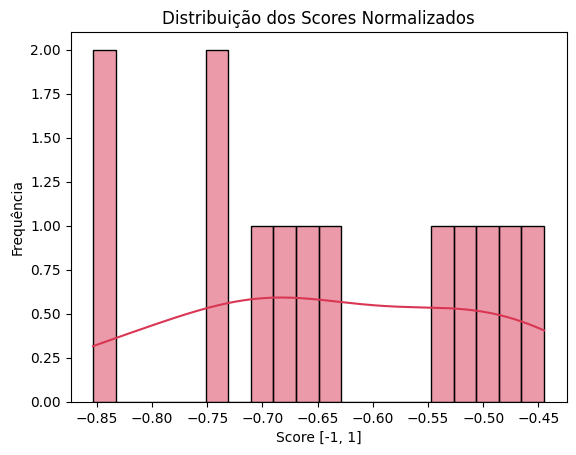

In [25]:
## Construção do Histograma
sns.histplot(df_f['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

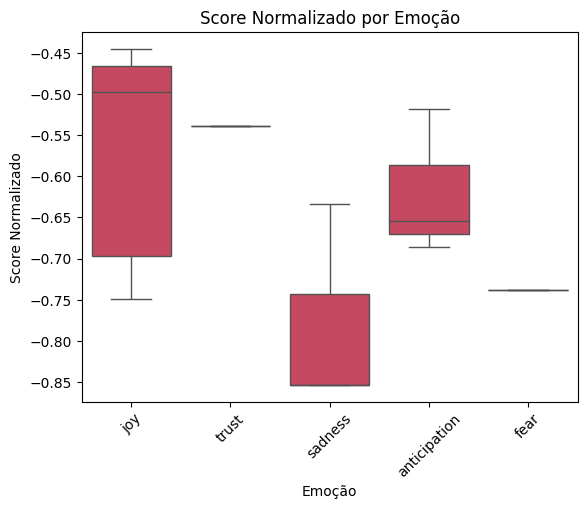

In [26]:
sns.boxplot(x='sentiment', y='score', data=df_f, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

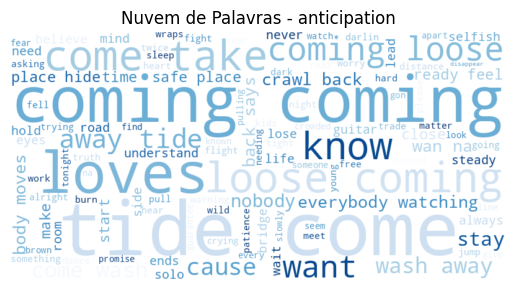

Nenhuma letra encontrada para a emoção 'disgust'.
Nenhuma letra encontrada para a emoção 'anger'.


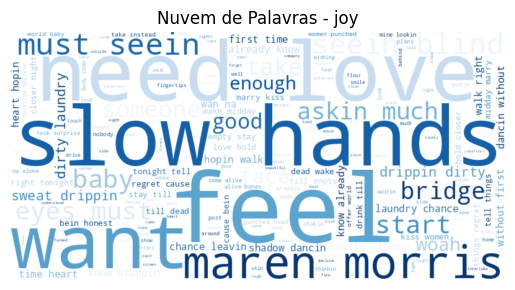

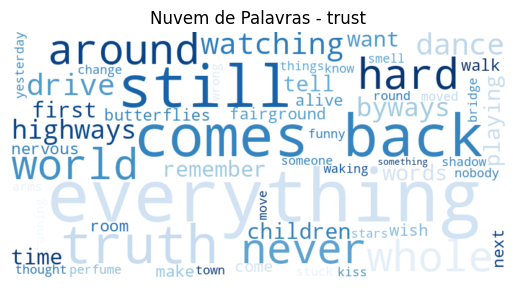

Nenhuma letra encontrada para a emoção 'surprise'.


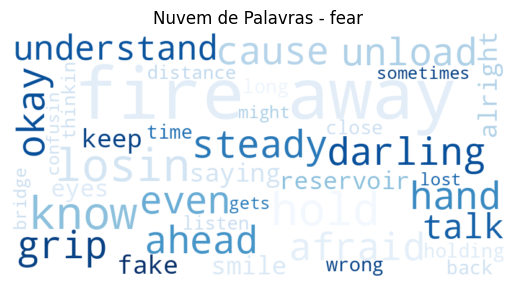

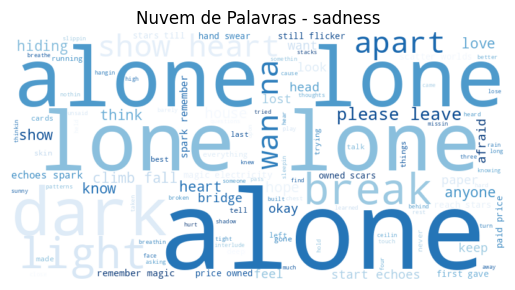

In [27]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_f[df_f['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

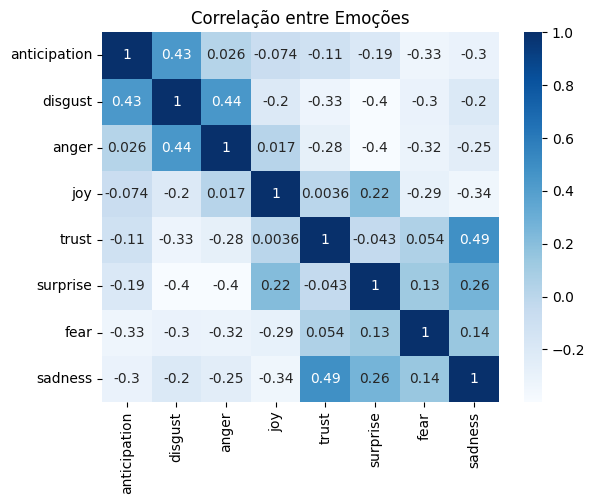

In [28]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_f['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

### Análise do Álbum Heartbreak Weather

*Heartbreak Weather* é o segundo álbum de estúdio do cantor. Foi lançado pela *Capitol Records* em 13 de março de 2020. O disco foi desenvolvido e gravado entre 2018 e 2020, onde Horan contou com a ajuda de Teddy Geiger, Tobias Jesso Jr., Greg Kurstin entre outros. O álbum foi precedido pelos *singles*: "Nice to Meet Ya", "Put a Little Love on Me", "No Judgement" e "Black and White".

*Heartbreak Weather* recebeu críticas positivas dos críticos de música. O álbum estreou em quarto lugar na *Billboard 200* e número um na *UK Albums Chart*.

Mais informações em: https://pt.wikipedia.org/wiki/Heartbreak_Weather


In [29]:
# Filtrando o DataFrame para excluir músicas do seu álbum
df_hw = df[df['Album'].isin(['Heartbreak Weather 5'])]

# Exibindo o DataFrame filtrado
df_hw

title  \
4           Nice to Meet Ya   
5   Put a Little Love on Me   
7           Black And White   
10       Heartbreak Weather   
11                    Still   
14             No Judgement   
17               Small Talk   
19            Dear Patience   
21               Everywhere   
24          Cross Your Mind   
25       Arms of a Stranger   
27           Bend the Rules   
28            San Francisco   
32                New Angel   
37                  Nothing   
38                    Dress   

                                               lyrics                 Album  \
4   like talk like things wear want number tattooe...  Heartbreak Weather 5   
5   fight high holdin love came cause nothing hold...  Heartbreak Weather 5   
7   first night standin door fumblin keys kissed w...  Heartbreak Weather 5   
10  swear lightnin comin eyes startin fire hotel r...  Heartbreak Weather 5   
11  mind complicated find hard rearrange find some...  Heartbreak Weather 5   
14  barefoot bottle wine stay tonight change aroun...  Heartbreak Weather 5   
17  lookin night terrified know baby wrong crazy m...  Heartbreak Weather 5   
19  dear patience share drink pressure dear patien...  Heartbreak Weather 5   
21  walk room quiet catch eyes blink eyelid feels ...  Heartbreak Weather 5   
24  world wanna live ocean wanna swim show watchin...  Heartbreak Weather 5   
25  never thought would find lovers dark known som...  Heartbreak Weather 5   
27  called miss babe wonder doin your favourite pl...  Heartbreak Weather 5   
28  moon shining rising want wake lights fading ch...  Heartbreak Weather 5   
32  many hours night every second every thought wr...  Heartbreak Weather 5   
37  holds alone makes tiger tame turns from black ...  Heartbreak Weather 5   
38  keep staring little white number left summer h...  Heartbreak Weather 5   

    release_year  Word Count     score     sentiment   filter  
4           2019         120 -0.539267           joy  intenso  
5           2019         148 -0.706806           joy   neutro  
7           2020         151 -0.235602           joy  intenso  
10          2020         135 -0.947644       sadness  intenso  
11          2020         125 -0.821990         trust  intenso  
14          2020         126 -0.664921          fear  intenso  
17          2020         157 -0.727749          fear   neutro  
19          2020         124 -0.497382  anticipation  intenso  
21          2020         149 -0.602094         trust  intenso  
24          2020         169 -1.000000          fear  intenso  
25          2020         147 -0.842932          fear  intenso  
27          2020         104 -0.769634         trust  intenso  
28          2020         144 -0.717277  anticipation   neutro  
32          2020         155  0.162304  anticipation  intenso  
37          2020         123 -0.727749           joy   neutro  
38          2020         131 -0.675393  anticipation  intenso

In [30]:
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_hw['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 2026 palavras no dataset de letra.
Existem 516 palavras únicas no dataset de letras.


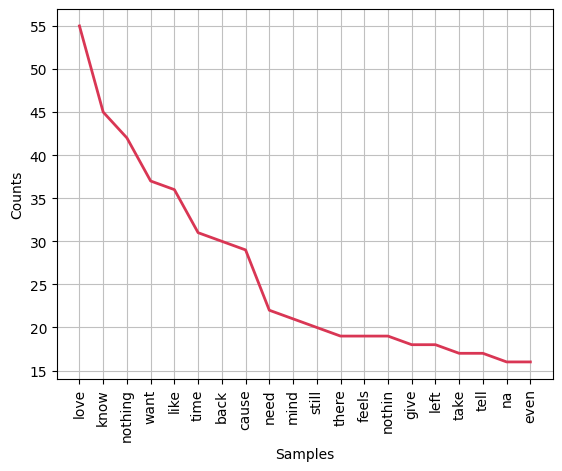

In [31]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

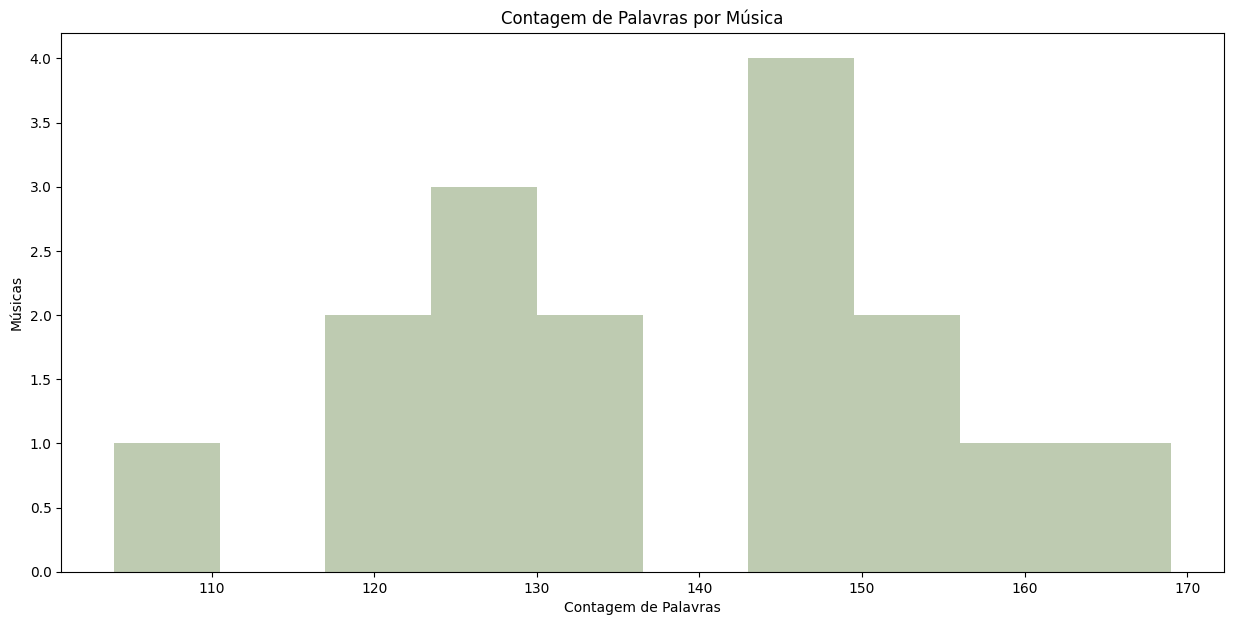

In [32]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_dopamine
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_hw['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

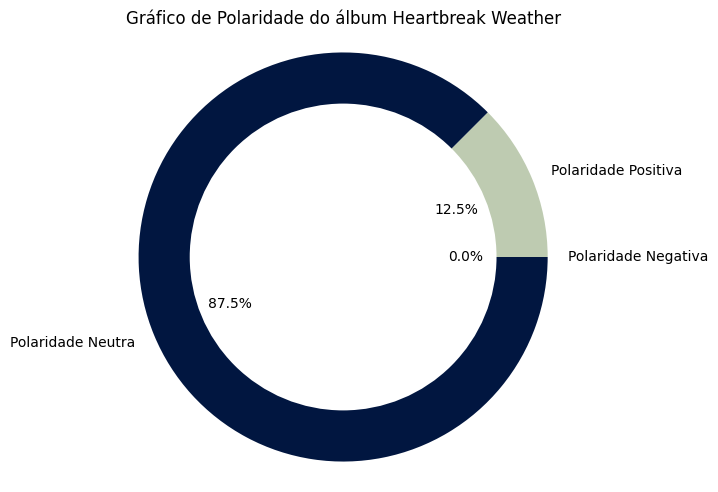

In [33]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_hw['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_hw['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum Heartbreak Weather')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    O álbum apresenta 12.5% de polaridade positiva.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-34-b9adee352ab6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hw['lyrics'] = df_hw['lyrics'].fillna('')  # Substitui valores nulos por string vazia


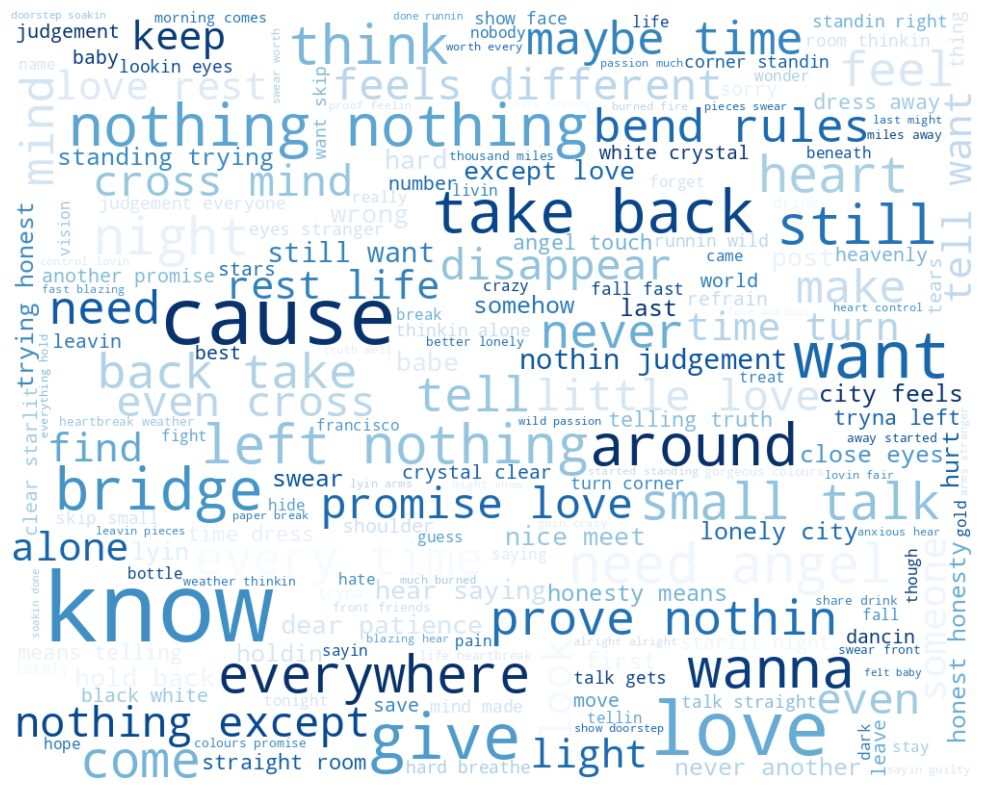

In [34]:
# Exibir os nomes das colunas do DataFrame
print(df_hw.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_hw.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_hw['lyrics'] = df_hw['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_hw['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

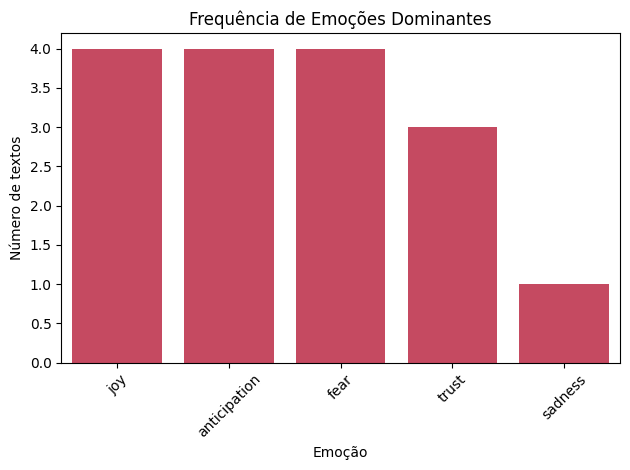

In [35]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_hw,
    order=df_hw['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

#Exibição do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

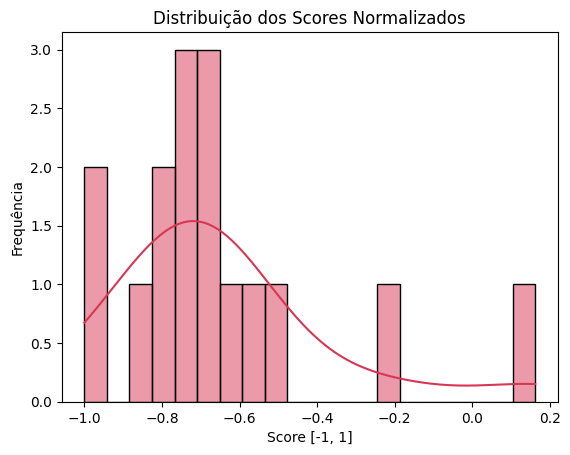

In [36]:
# Gerando o Histograma
sns.histplot(df_hw['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

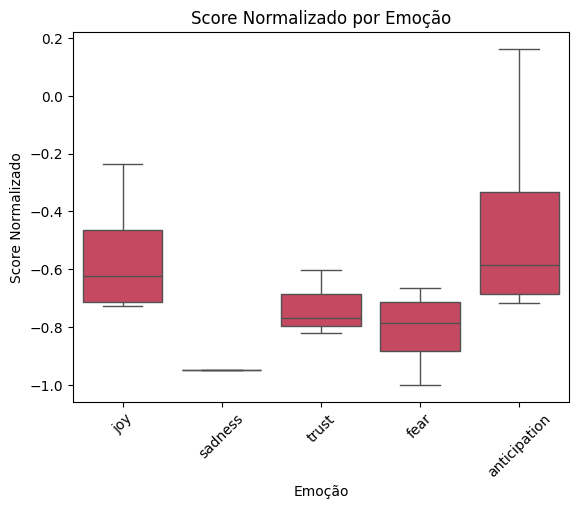

In [37]:
# Gerando o Boxplot
sns.boxplot(x='sentiment', y='score', data=df_hw, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

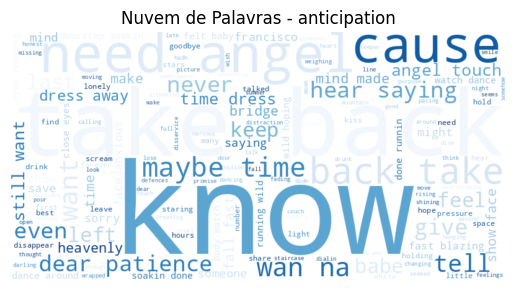

Nenhuma letra encontrada para a emoção 'disgust'.
Nenhuma letra encontrada para a emoção 'anger'.


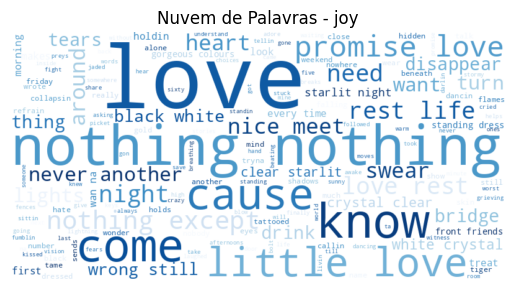

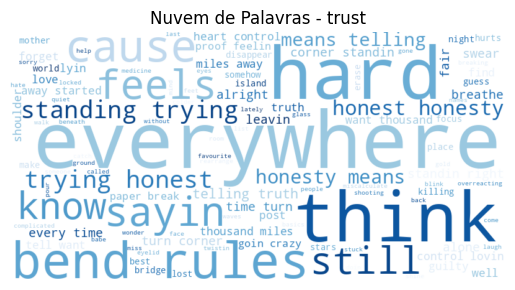

Nenhuma letra encontrada para a emoção 'surprise'.


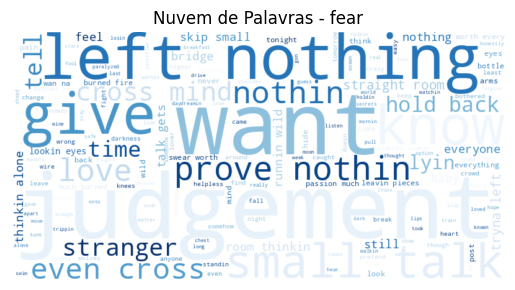

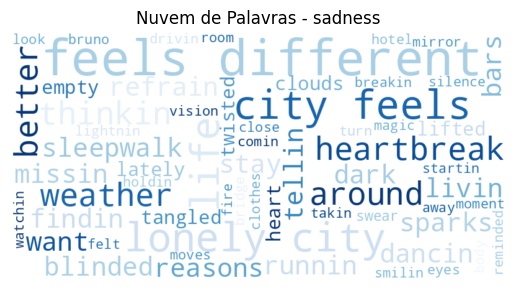

In [38]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_hw[df_hw['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

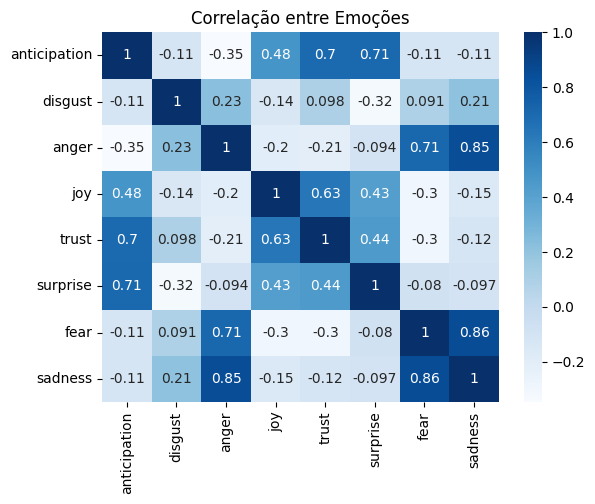

In [39]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_hw['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

### Análise do Álbum The Show

*The Show* é o terceiro álbum de estúdio do, lançado em 9 de junho de 2023, através das gravadoras *Capitol Records* e *Neon Haze*.

Mais informações em: https://pt.wikipedia.org/wiki/The_Show_(%C3%A1lbum)

In [40]:
# Filtrando o DataFrame para excluir músicas do seu álbum
df_ts = df[df['Album'].isin(['The Show: The Encore'])]

# Exibindo o DataFrame filtrado
df_ts

title  \
6                                    Heaven   
18                                 The Show   
26                                 Meltdown   
29                                  Science   
30                   You Could Start A Cult   
31                            Never Grow Up   
33                             Must Be Love   
34                          If You Leave Me   
35                             Save My Life   
36                  On A Night Like Tonight   
39  You Could Start A Cult (Encore Version)   

                                               lyrics                 Album  \
6   strange light revolves around float across roo...  The Show: The Encore   
18  life like board game time mistakes heartbreaks...  The Show: The Encore   
26  melts down there talkin bathroom losin mind mi...  The Show: The Encore   
29  feel beneath stone cold feet numb touch silenc...  The Show: The Encore   
30  darlin give everything baby could start cult a...  The Show: The Encore   
31  never never never never grow grow never never ...  The Show: The Encore   
33  specialist overthinkin everything tell time be...  The Show: The Encore   
34  ever dream chase street turned around gone wok...  The Show: The Encore   
35  eyes bloomin floor shakin walls movin feeling ...  The Show: The Encore   
36  wantin summer skin pressed mine fallin like ra...  The Show: The Encore   
39  darlin give everything baby could start cult a...  The Show: The Encore   

    release_year  Word Count     score     sentiment   filter  
6           2023         109 -0.361257           joy  intenso  
18          2023         151 -0.371728  anticipation  intenso  
26          2023         137 -0.748691          fear   neutro  
29          2023          80 -0.717277      surprise   neutro  
30          2023          59 -0.643979  anticipation  intenso  
31          2023         216  1.000000           joy  intenso  
33          2023         113 -0.602094           joy  intenso  
34          2023         122 -0.696335      surprise  intenso  
35          2023         141 -0.298429         trust  intenso  
36          2023         150 -0.685864          fear  intenso  
39          2023          80 -0.623037  anticipation  intenso

In [41]:
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_ts['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 1219 palavras no dataset de letra.
Existem 338 palavras únicas no dataset de letras.


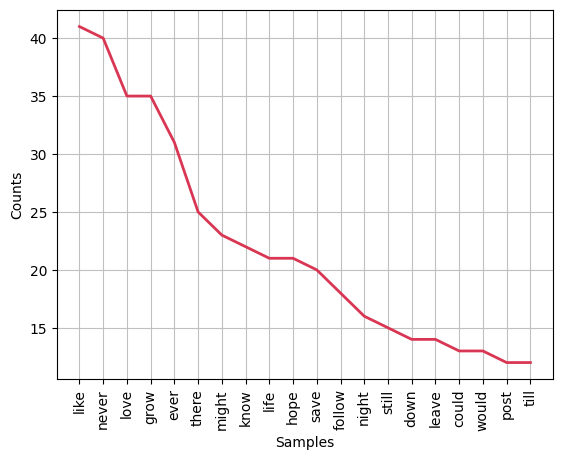

In [42]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

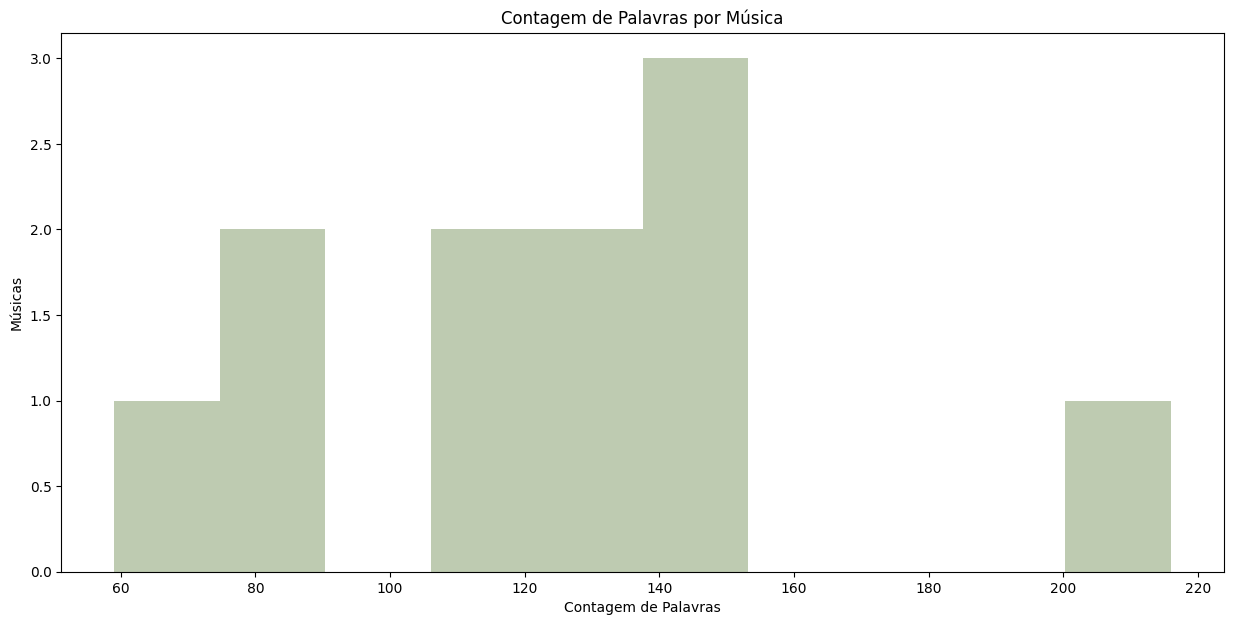

In [43]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_dopamine
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_ts['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

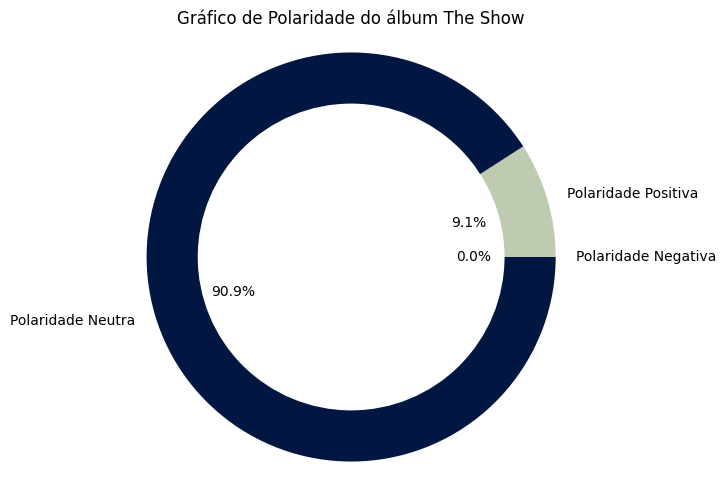

In [44]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_ts['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_ts['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum The Show')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    O álbum apresenta 9.1% de polaridade positiva.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-45-d663680ad25c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts['lyrics'] = df_ts['lyrics'].fillna('')  # Substitui valores nulos por string vazia


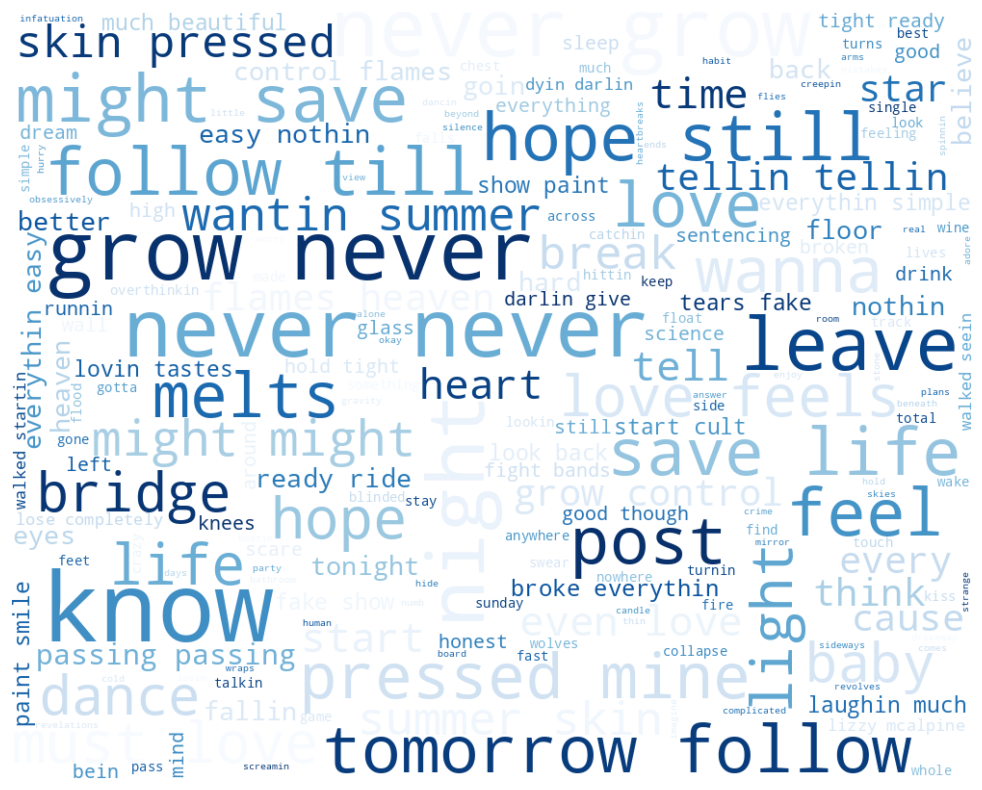

In [45]:
# Exibir os nomes das colunas do DataFrame
print(df_ts.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_ts.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_ts['lyrics'] = df_ts['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_ts['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

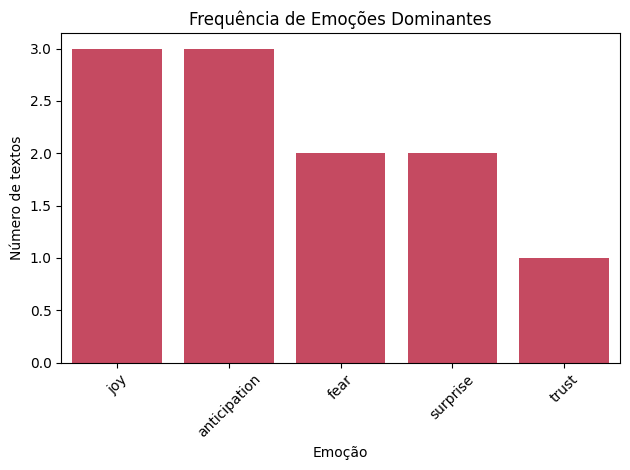

In [46]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_ts,
    order=df_ts['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

#Exibição do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

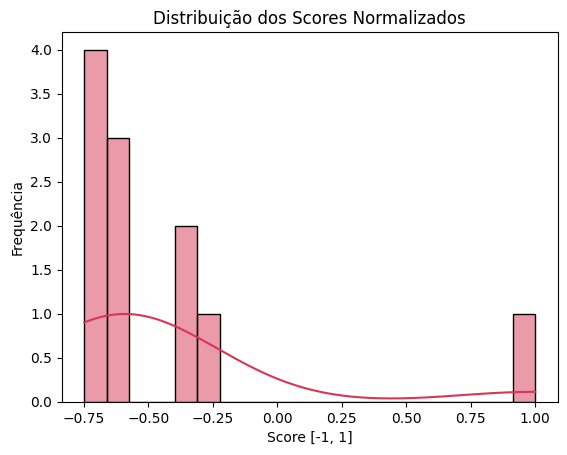

In [47]:
# Gerando o Histograma
sns.histplot(df_ts['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

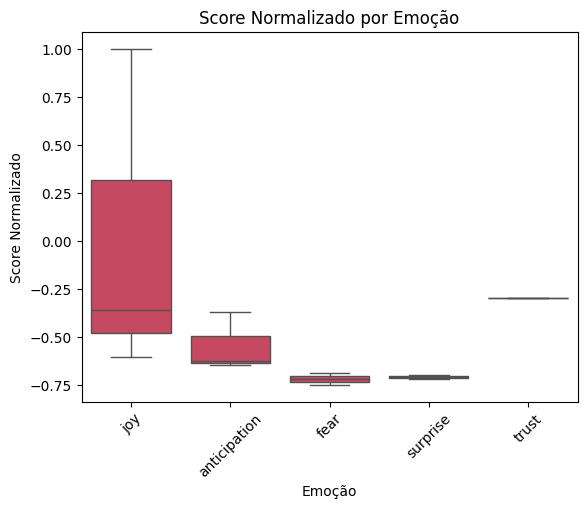

In [48]:
# Gerando o Boxplot
sns.boxplot(x='sentiment', y='score', data=df_ts, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

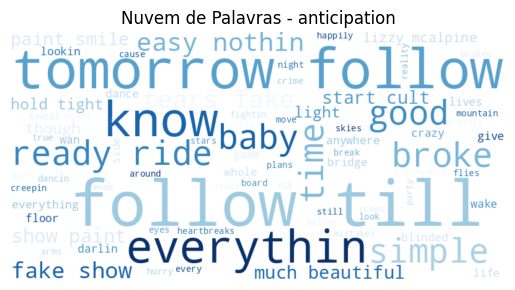

Nenhuma letra encontrada para a emoção 'disgust'.
Nenhuma letra encontrada para a emoção 'anger'.


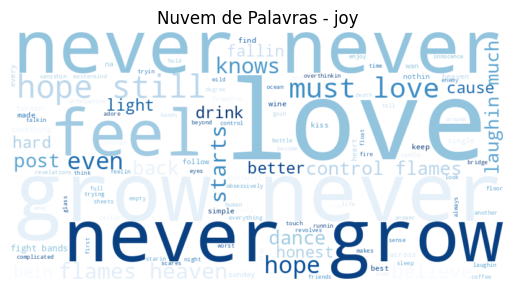

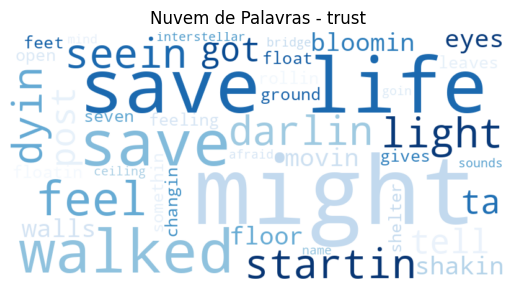

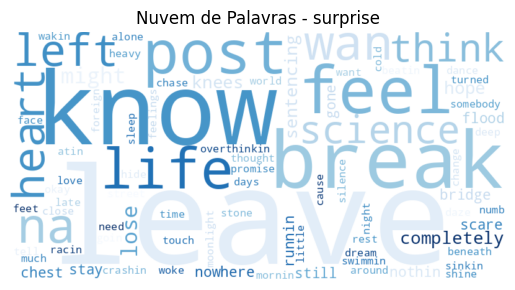

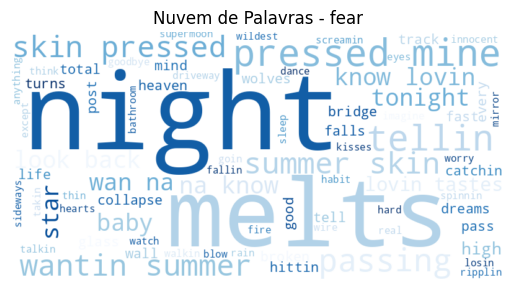

Nenhuma letra encontrada para a emoção 'sadness'.


In [49]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_ts[df_ts['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

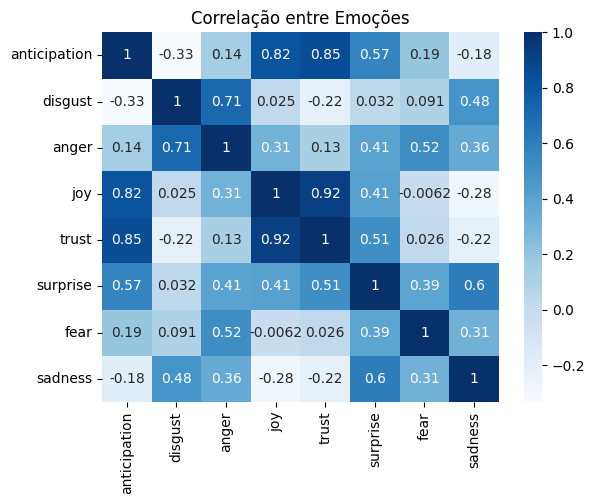

In [50]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_ts['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()